# Evaluate different models for datasets

In [10]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)
figPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/figures"
os.makedirs(figPath, exist_ok=True)

Text(0.5, 1.0, "Eva's variables - publication")

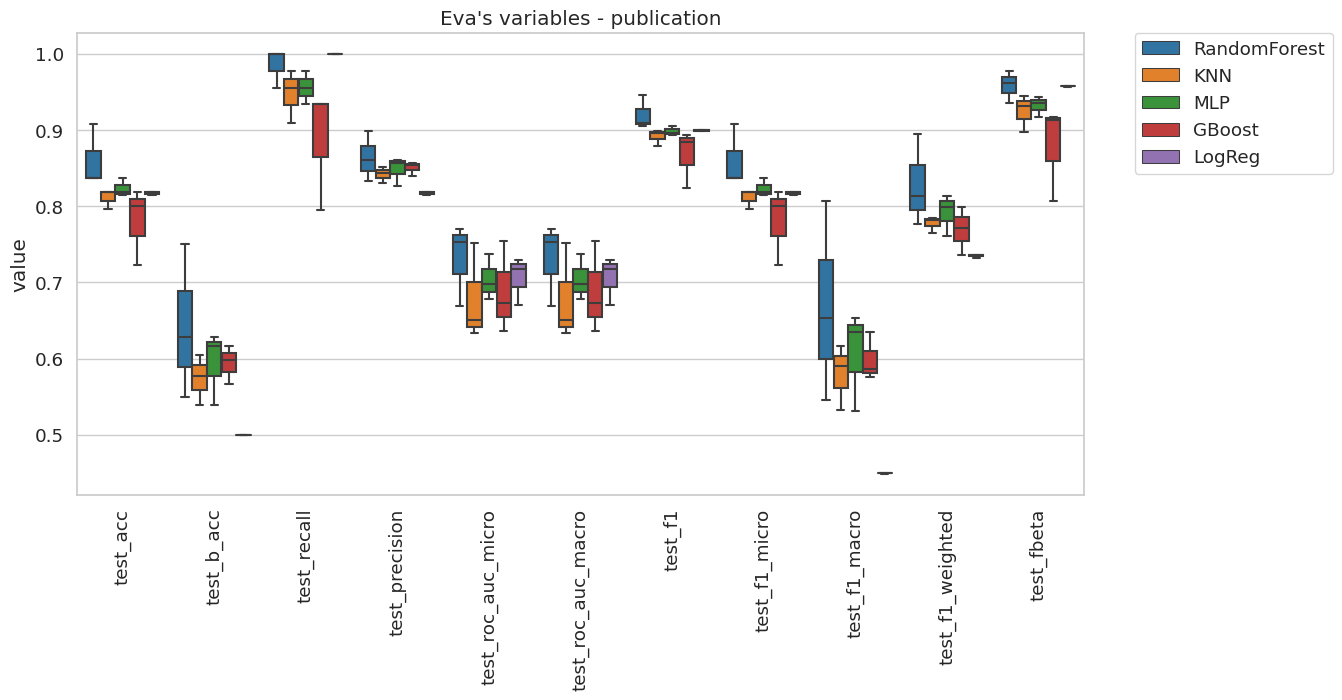

In [2]:
'''
Define paths
'''
varPath = f"../../results/featureSelection/eva/publication.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
resultsPath = f"../../results/prediction/featureSelection/eva/modelComparison/{varPath_name}"

''' 
Read in scores
'''
input = pd.DataFrame()
for file in os.listdir(resultsPath):
    if file.endswith("score.csv"):
        input = pd.concat([input,pd.read_csv(f"{resultsPath}/{file}")], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = input.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Eva's variables - {varPath_name}")

Text(0.5, 1.0, "Eva's variables - publication_admission")

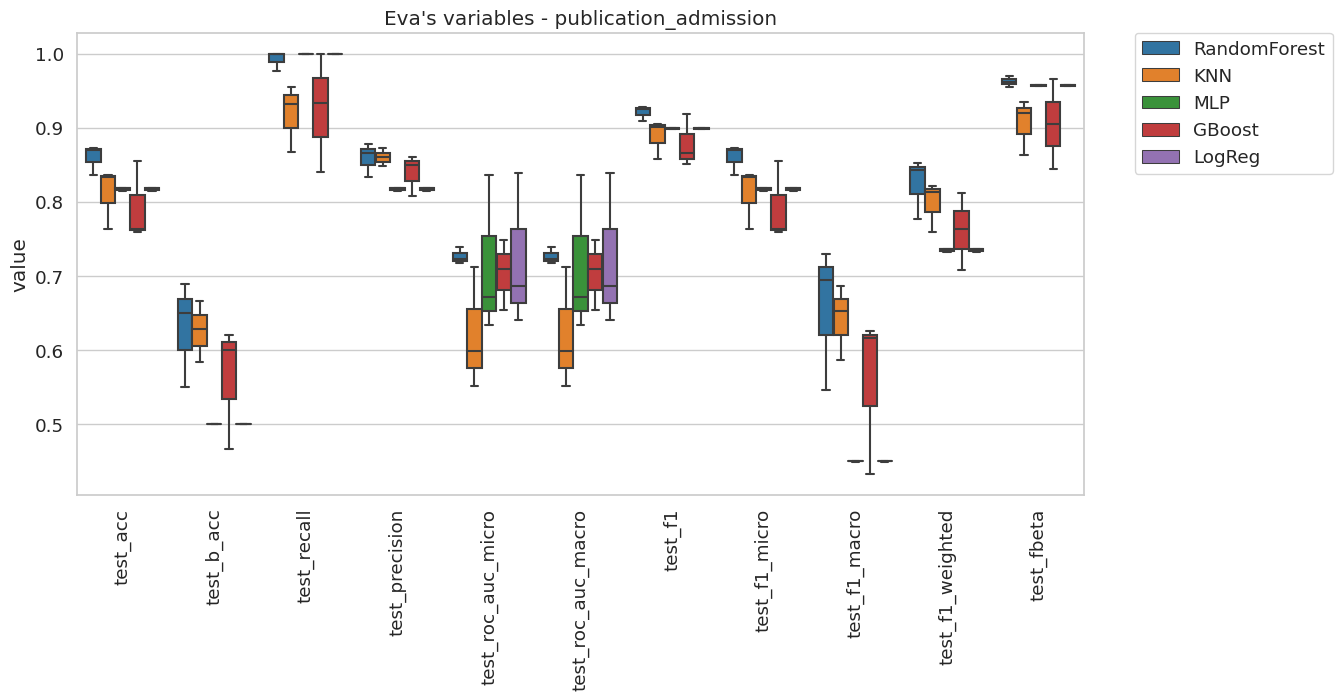

In [3]:
'''
Define paths
'''
varPath = f"../../results/featureSelection/eva/publication_admission.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
resultsPath = f"../../results/prediction/featureSelection/eva/modelComparison/{varPath_name}"

''' 
Read in scores
'''
input = pd.DataFrame()
for file in os.listdir(resultsPath):
    if file.endswith("score.csv"):
        input = pd.concat([input,pd.read_csv(f"{resultsPath}/{file}")], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = input.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Eva's variables - {varPath_name}")

# Compare uponAdmission with hospitalisation

Text(0.5, 1.0, "Eva's variables")

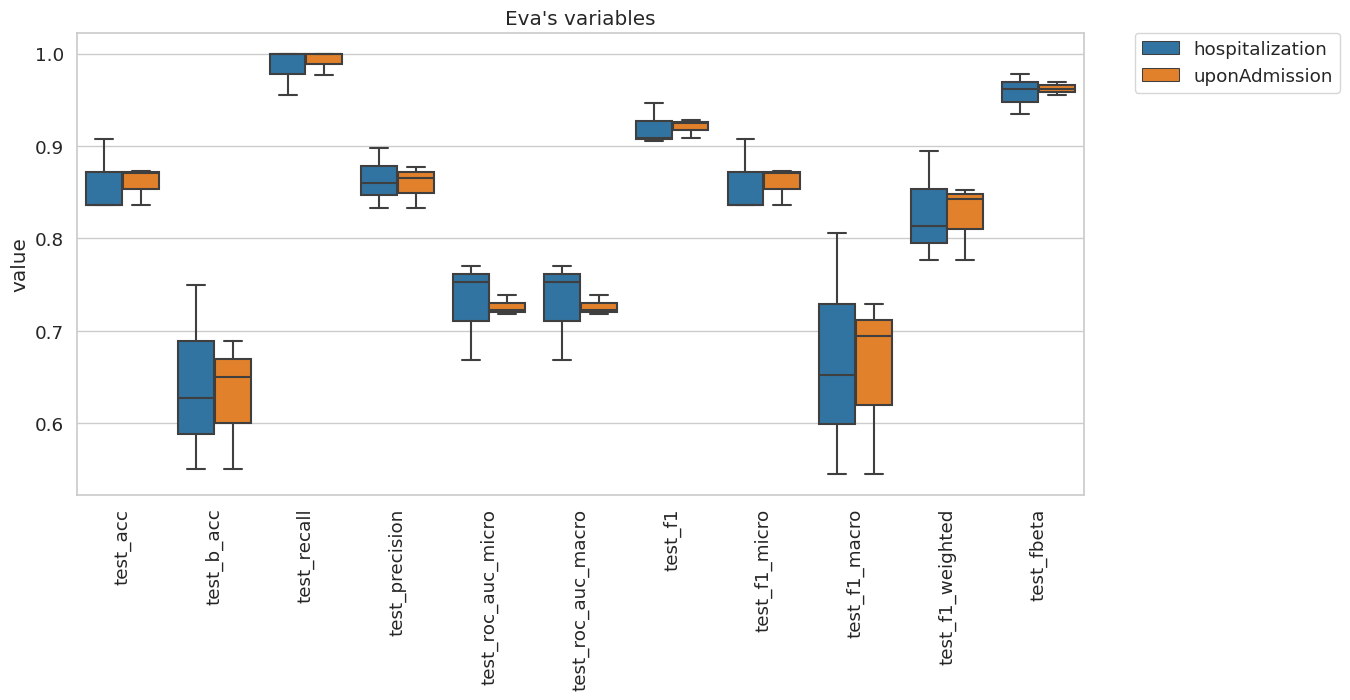

In [4]:
resultsPath_hosp = f"../../results/prediction/featureSelection/eva/modelComparison/publication"
resultsPath_adm = f"../../results/prediction/featureSelection/eva/modelComparison/publication_admission"

''' 
Read data
'''
df_hosp = pd.read_csv(f"{resultsPath_hosp}/RandomForest_score.csv")
df_adm = pd.read_csv(f"{resultsPath_adm}/RandomForest_score.csv")
df_hosp["timepoint"] = "hospitalization"
df_adm["timepoint"] = "uponAdmission"
df = pd.concat([df_hosp, df_adm], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
df_plot = df_plot.melt("timepoint")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="timepoint")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Eva's variables")

# Check feature importance

In [5]:
'''
Define paths
'''
varPath = f"../../results/featureSelection/eva/publication_admission.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
resultsPath = f"../../results/prediction/featureSelection/eva/modelComparison/{varPath_name}"

Text(0.5, 1.0, 'publication_admission')

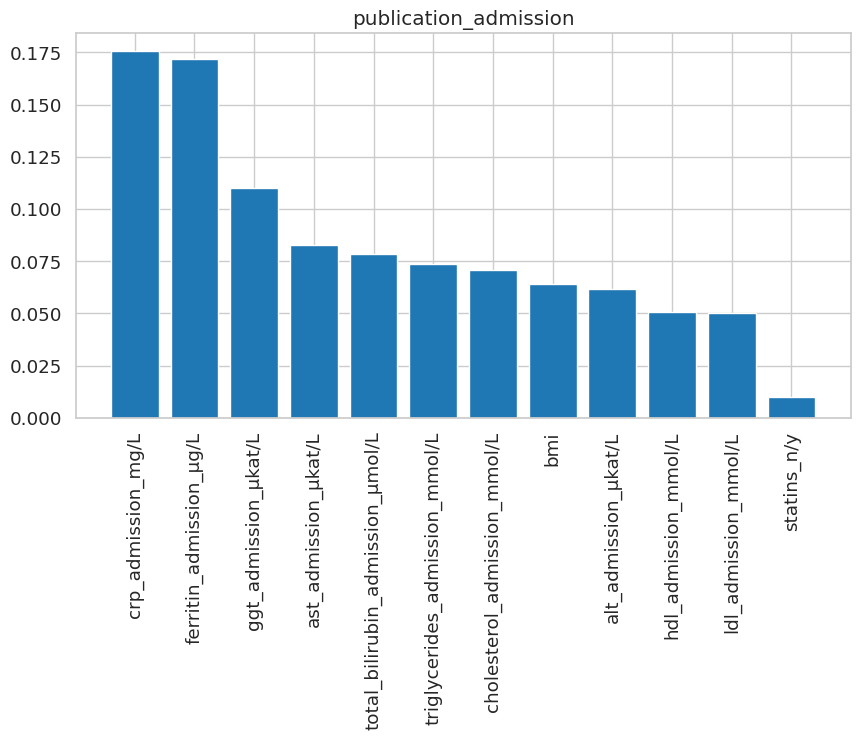

In [6]:
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df["var"], df["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"{varPath_name}")

# Compare Eva's with Boruta

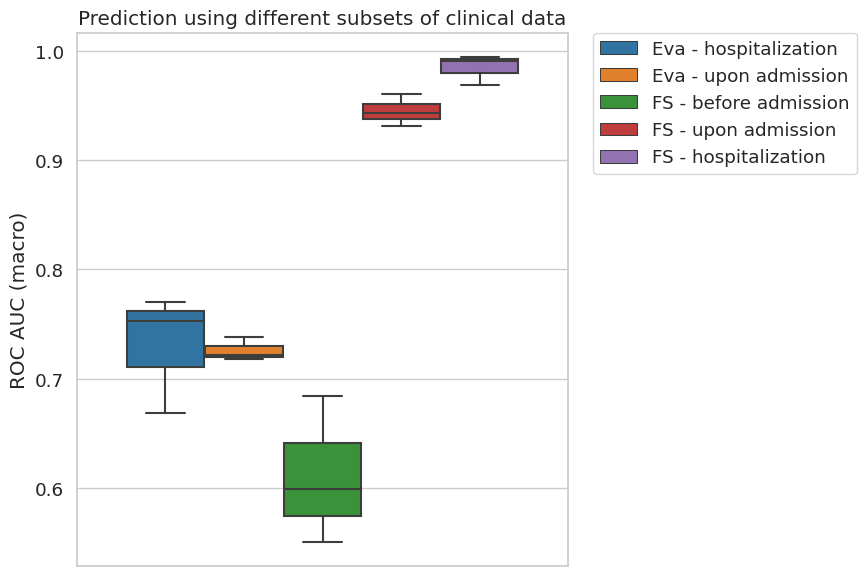

In [13]:
resultsPath_hosp = f"../../results/prediction/featureSelection/eva/modelComparison/publication"
resultsPath_adm = f"../../results/prediction/featureSelection/eva/modelComparison/publication_admission"

''' 
Read Eva's data
'''
df_hosp = pd.read_csv(f"{resultsPath_hosp}/RandomForest_score.csv")
#print(df_hosp.mean())
df_adm = pd.read_csv(f"{resultsPath_adm}/RandomForest_score.csv")
#print(df_adm.mean())
df_hosp["timepoint"] = "eva_hospitalization"
df_adm["timepoint"] = "eva_uponAdmission"
df = pd.concat([df_hosp, df_adm], axis=0, ignore_index=True)

''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_beforeAdmission","12_uponAdmission", "12_hospitalization"]: #
    varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
    resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_score.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

df = pd.concat([df, input], axis=0, ignore_index=True)

''' 
Plot
'''

#df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
df_plot = df.loc[:,["test_roc_auc_macro", "timepoint"]]
df_plot = df_plot.melt("timepoint")
df_plot["timepoint"].replace("eva_hospitalization", "Eva - hospitalization", inplace=True)
df_plot["timepoint"].replace("eva_uponAdmission", "Eva - upon admission", inplace=True)
df_plot["timepoint"].replace("beforeAdmission", "FS - before admission", inplace=True)
df_plot["timepoint"].replace("uponAdmission", "FS - upon admission", inplace=True)
df_plot["timepoint"].replace("hospitalization", "FS - hospitalization", inplace=True)

fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="timepoint")
#ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,)
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_ylabel("ROC AUC (macro)")
ax.set_title(f"Prediction using different subsets of clinical data")
plt.tight_layout()
plt.savefig(f"{figPath}/compareEvaClinical_rocaucmacro.png", dpi=300,  bbox_inches = "tight")

In [5]:
df_plot

,timepoint,variable,value
0,eva_hospitalization,test_roc_auc_macro,0.753333
1,eva_hospitalization,test_roc_auc_macro,0.668889
2,eva_hospitalization,test_roc_auc_macro,0.770455
3,eva_uponAdmission,test_roc_auc_macro,0.717778
4,eva_uponAdmission,test_roc_auc_macro,0.722222
5,eva_uponAdmission,test_roc_auc_macro,0.738636
6,beforeAdmission,test_roc_auc_macro,0.598889
7,beforeAdmission,test_roc_auc_macro,0.551111
8,beforeAdmission,test_roc_auc_macro,0.684091
9,uponAdmission,test_roc_auc_macro,0.960000


Text(0.5, 1.0, 'Watch out: sizes of bars can not be compared between datasets!')

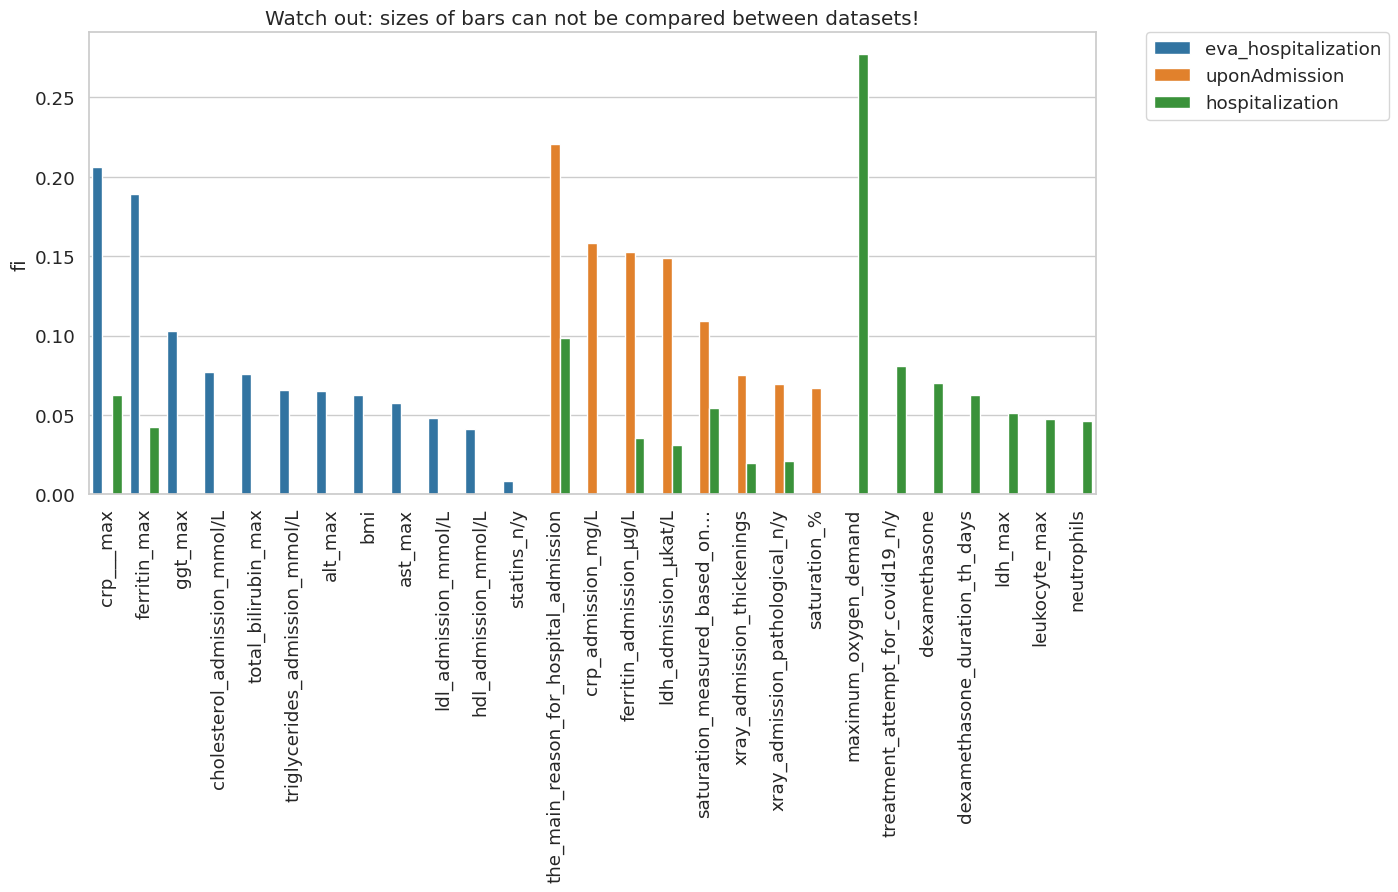

In [8]:
''' 
Read Eva's data
'''
resultsPath_hosp = f"../../results/prediction/featureSelection/eva/modelComparison/publication"
resultsPath_adm = f"../../results/prediction/featureSelection/eva/modelComparison/publication_admission"

df_hosp = pd.read_csv(f"{resultsPath_hosp}/RandomForest_featureImportance.csv")
df_adm = pd.read_csv(f"{resultsPath_adm}/RandomForest_featureImportance.csv")
df_hosp["timepoint"] = "eva_hospitalization"
df_adm["timepoint"] = "eva_uponAdmission"
#df = pd.concat([df_hosp, df_adm], axis=0, ignore_index=True)
df = df_hosp

''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_uponAdmission", "12_hospitalization"]: #12_beforeAdmission
    varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
    resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_featureImportance.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

df = pd.concat([df, input], axis=0, ignore_index=True)

# ''' 
# Plot
# '''

# df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
# df_plot = df_plot.melt("timepoint")

fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=df, x="var", y="fi", hue="timepoint")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Watch out: sizes of bars can not be compared between datasets!")